In [32]:
from numpy import array,arange,loadtxt
from matplotlib.pyplot import show,figure,plot,xlim,ylim,legend
from scipy.optimize import curve_fit

In [33]:
def fce_linear(x,a,b):
    return a * x + b

In [34]:
def fce_quad(x,a,b,c):
    return a * x + b * x**2 + c

In [35]:
def fce_trip(x,a,b,c,d):
    return a * x + b * x**2 + c * x**3 +d

In [50]:
z = loadtxt('calibration.ini',unpack=True)
x,y = z

In [37]:
opt_lin,var=curve_fit(fce_linear,x,y)
opt_quad,var=curve_fit(fce_quad,x,y)
opt_trip,var=curve_fit(fce_trip,x,y)

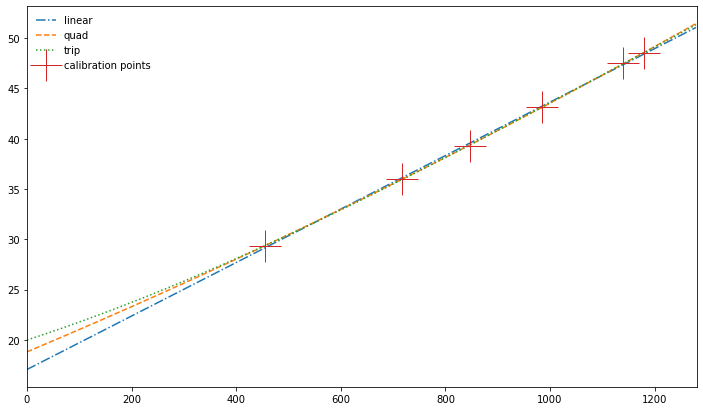

In [38]:
_x = arange(0,1280)

figure(figsize=(12,7))

plot(_x,fce_linear(_x,*opt_lin),'-.',label='linear')
plot(_x,fce_quad(_x,*opt_quad),'--',label='quad')
plot(_x,fce_trip(_x,*opt_trip),':',label='trip')
plot(x,y,'+',ms=32,label='calibration points')

xlim(0,1280)
legend(frameon=False)


In [109]:
from numpy import array,append,pad,trim_zeros,where,swapaxes

In [103]:
x = array([[2,2,2,2],[3,3,3,3],[4,4,4,4],[5,5,5,5]])

In [104]:
x[::2],x[1::2]

(array([[2, 2, 2, 2],
        [4, 4, 4, 4]]),
 array([[3, 3, 3, 3],
        [5, 5, 5, 5]]))

In [105]:
append(x,array([[0],[0],[0],[0]]),axis=1)

array([[2, 2, 2, 2, 0],
       [3, 3, 3, 3, 0],
       [4, 4, 4, 4, 0],
       [5, 5, 5, 5, 0]])

In [113]:
def ppad_p(x):
    y0 = pad(x,((0,0,0),(1,0,0)))
    y1 = pad(x,((0,0,0),(0,1,0)))
    y0[0::2] = y1[0::2]
    
    return y0

def ppad_m(x):
    y0 = pad(x,((0,0),(1,0)))
    y1 = pad(x,((0,0),(0,1)))
    y0[1::2] = y1[1::2]
    
    return y0

In [145]:
xx = swapaxes(array([x,x,x]),0,2)
xx.shape,xx

((4, 4, 3),
 array([[[2, 2, 2],
         [3, 3, 3],
         [4, 4, 4],
         [5, 5, 5]],
 
        [[2, 2, 2],
         [3, 3, 3],
         [4, 4, 4],
         [5, 5, 5]],
 
        [[2, 2, 2],
         [3, 3, 3],
         [4, 4, 4],
         [5, 5, 5]],
 
        [[2, 2, 2],
         [3, 3, 3],
         [4, 4, 4],
         [5, 5, 5]]]))

In [162]:
yy = pad(xx,((0,0),(1,0),(0,0)))
yy1 = pad(xx,((0,0),(0,1),(0,0)))
yy,yy1

(array([[[0, 0, 0],
         [2, 2, 2],
         [3, 3, 3],
         [4, 4, 4],
         [5, 5, 5]],
 
        [[0, 0, 0],
         [2, 2, 2],
         [3, 3, 3],
         [4, 4, 4],
         [5, 5, 5]],
 
        [[0, 0, 0],
         [2, 2, 2],
         [3, 3, 3],
         [4, 4, 4],
         [5, 5, 5]],
 
        [[0, 0, 0],
         [2, 2, 2],
         [3, 3, 3],
         [4, 4, 4],
         [5, 5, 5]]]),
 array([[[2, 2, 2],
         [3, 3, 3],
         [4, 4, 4],
         [5, 5, 5],
         [0, 0, 0]],
 
        [[2, 2, 2],
         [3, 3, 3],
         [4, 4, 4],
         [5, 5, 5],
         [0, 0, 0]],
 
        [[2, 2, 2],
         [3, 3, 3],
         [4, 4, 4],
         [5, 5, 5],
         [0, 0, 0]],
 
        [[2, 2, 2],
         [3, 3, 3],
         [4, 4, 4],
         [5, 5, 5],
         [0, 0, 0]]]))

In [163]:
yy[::2,:,:] = yy1[::2,:,:]
yy

array([[[2, 2, 2],
        [3, 3, 3],
        [4, 4, 4],
        [5, 5, 5],
        [0, 0, 0]],

       [[0, 0, 0],
        [2, 2, 2],
        [3, 3, 3],
        [4, 4, 4],
        [5, 5, 5]],

       [[2, 2, 2],
        [3, 3, 3],
        [4, 4, 4],
        [5, 5, 5],
        [0, 0, 0]],

       [[0, 0, 0],
        [2, 2, 2],
        [3, 3, 3],
        [4, 4, 4],
        [5, 5, 5]]])

In [96]:
q = ppad_m(ppad_m(x))
q

array([[0, 0, 2, 2, 2],
       [3, 3, 3, 0, 0],
       [0, 0, 4, 4, 4],
       [5, 5, 5, 0, 0]])

In [97]:
t = ppad_p(ppad_p(q))

In [98]:
p = where(t != 0)
t = t[min(p[0]) : max(p[0]) + 1, min(p[1]) : max(p[1]) + 1]

In [99]:
t

array([[2, 2, 2],
       [3, 3, 3],
       [4, 4, 4],
       [5, 5, 5]])